# Mediana dla obrazu kolorowego

Idea filtracji medianowej jest dość prosta dla obrazów w odcieniach szarości.
Dla obrazów kolorowych trudniej jest określić kryterium wg. którego szeregowane będą wartości, z których wyznaczana będzie mediana.

Jedną z możliwości wykonania filtracji medianowej dla obrazów kolorowych (na podstawie *The Image Processing Handbook*, J. Russ) jest wykorzystanie następującej definicji mediany:
``mediana to ten piksel z otoczenia, którego odległość do innych pikseli z otoczenia jest najmniejsza''.
Jako miarę odległości wykorzystujemy pierwiastek z sumy kwadratów różnic poszczególnych składowych R,G,B.
Zatem odległość między dwoma pikselami wyraża się wzorem:
\begin{equation}
dRGB = \sqrt{(R_1-R_2)^2+(G_1-G_2)^2+(B_1-B_2)^2}
\end{equation}

Warto zwrócić uwagę, że istnieje wiele możliwości zdefiniowania porównywania wielkości wektorowych (jeden piksel to wektor o trzech składowych).
Można zamiast odległości wykorzystać kąt albo połączyć oba parametry.
Ponadto istnieje możliwość dodania do wektora dodatkowych składowych - tak aby lepiej opisać piksel.

Celem zadania jest implementacja opisanego algorytmu.

    1. Wczytaj obraz *lenaRGBSzum.png* (dostępny na git).
    2. Zdefiniuj rozmiar okna.
    3. Wykonaj pętle po pikselach, dla których okno jest zdefiniowane (pomiń brzeg obrazu).
    4. Dla każdego piksela pobierz okno o właściwym rozmiarze.
    5. Wykonaj pętle po oknie, wewnątrz której obliczona zostanie suma odległości.
        - Obliczanie różnicy: `window - window[rowWin, colWin]`.
        - Obliczanie kwadratów: `np.square`.
        - Obliczanie pierwiastka: `np.sqrt`.
        - Obliczanie sumy metodą `.sum`.
    6. Po obliczeniu macierzy odległości wyznacz argument elementu minimalnego.
    Wykorzystaj funkcję `np.argmin`.
    Argument funkcji zostanie spłaszczony, jeśli ma więcej niż jeden wymiar.
    Aby przekonwertować spłaszczony indeks na indeks macierzy wykorzystaj funkcję `np.unravel_index`.
    7. Przypisz odpowiedni wektor wartości do piksela obrazu wynikowego.
    8. Wyświetl obraz oryginalny i przefiltrowany.
    9. Przeprowadź dwa eksperymenty - dla obrazu _lenaRGB_ oraz _lenaRGBszum_.

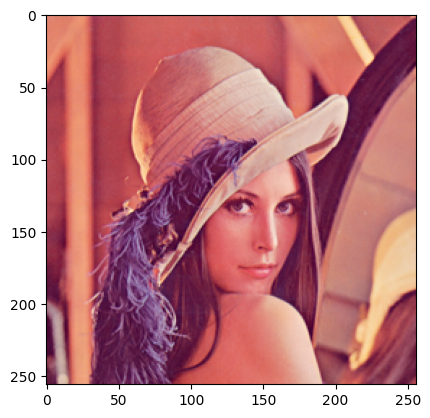

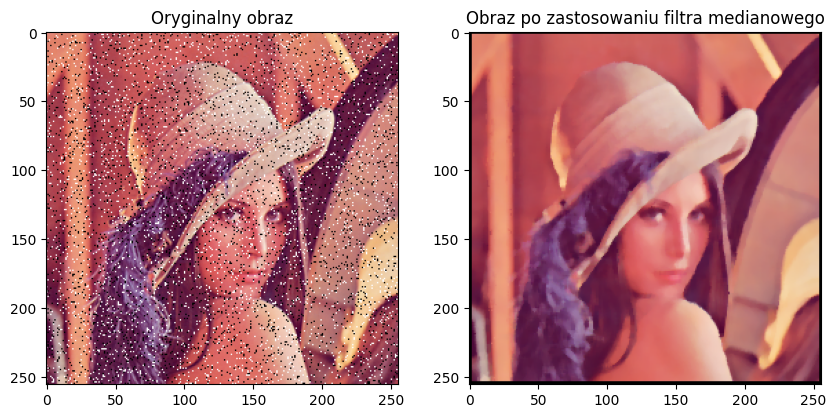

In [40]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/'

fileNames = ["lenaRGB.png", "lenaRGBSzum.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

lenaRGB=cv2.imread("lenaRGB.png")
lenaRGB=cv2.cvtColor(lenaRGB, cv2.COLOR_BGR2RGB)
lenaRGBszum=cv2.imread("lenaRGBSzum.png")
lenaRGBszum=cv2.cvtColor(lenaRGBszum, cv2.COLOR_BGR2RGB)
plt.imshow(lenaRGB)


def apply_median_filter(image, window_size):
    height, width = image.shape[:2]
    filtered_image = np.zeros_like(image)

    for row in range(window_size, height - window_size):
        for col in range(window_size, width - window_size):
            window = image[row - window_size : row + window_size + 1, col - window_size : col + window_size + 1, :]     
            median_values = np.median(window, axis=(0, 1))     
            filtered_image[row, col, :] = median_values.astype(np.uint8)
    return filtered_image



filtered_image = apply_median_filter(lenaRGBszum, window_size)

window_size = 2
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(lenaRGBszum)
plt.title('Oryginalny obraz')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image)
plt.title('Obraz po zastosowaniu filtra medianowego')

plt.show()